# IMPORT LIBRARIES & DATA


In [1]:

import sys
sys.path.append('../src')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from GA import solve

import random


In [2]:
distance_df = pd.read_csv('../data/HN_distance_matrix.csv', index_col=0)
distance_matrix = distance_df.values

# Kiểm tra sơ bộ
print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])


Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48


In [3]:
def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    return len(generation_fitness)

# GA + Local search


=== Số người (m) = 1 ===


Chạy GA (m = 1):   0%|                          | 1/300 [00:01<08:03,  1.62s/it]

[Gen   0] Best fitness: 1626.76


Chạy GA (m = 1):   7%|█▊                       | 22/300 [00:04<00:40,  6.93it/s]

[Gen  20] Best fitness: 1252.31


Chạy GA (m = 1):  14%|███▍                     | 41/300 [00:07<00:38,  6.77it/s]

[Gen  40] Best fitness: 1169.21


Chạy GA (m = 1):  21%|█████▏                   | 62/300 [00:10<00:29,  7.96it/s]

[Gen  60] Best fitness: 1169.21


Chạy GA (m = 1):  27%|██████▊                  | 81/300 [00:13<00:38,  5.68it/s]

[Gen  80] Best fitness: 1126.14


Chạy GA (m = 1):  34%|████████▏               | 102/300 [00:16<00:27,  7.23it/s]

[Gen 100] Best fitness: 1126.14


Chạy GA (m = 1):  41%|█████████▊              | 122/300 [00:19<00:23,  7.72it/s]

[Gen 120] Best fitness: 1089.89


Chạy GA (m = 1):  47%|███████████▎            | 142/300 [00:22<00:20,  7.66it/s]

[Gen 140] Best fitness: 1041.17


Chạy GA (m = 1):  54%|████████████▉           | 162/300 [00:24<00:15,  8.67it/s]

[Gen 160] Best fitness: 991.72


Chạy GA (m = 1):  61%|██████████████▌         | 182/300 [00:26<00:13,  8.71it/s]

[Gen 180] Best fitness: 894.42


Chạy GA (m = 1):  67%|████████████████▏       | 202/300 [00:29<00:10,  9.24it/s]

[Gen 200] Best fitness: 863.62


Chạy GA (m = 1):  74%|█████████████████▊      | 222/300 [00:32<00:10,  7.16it/s]

[Gen 220] Best fitness: 813.95


Chạy GA (m = 1):  80%|███████████████████▏    | 240/300 [00:36<00:22,  2.72it/s]

[Gen 240] Best fitness: 761.32


Chạy GA (m = 1):  87%|████████████████████▉   | 261/300 [00:43<00:10,  3.56it/s]

[Gen 260] Best fitness: 732.50


Chạy GA (m = 1):  94%|██████████████████████▍ | 281/300 [00:47<00:03,  5.15it/s]

[Gen 280] Best fitness: 704.80


Chạy GA (m = 1): 100%|████████████████████████| 300/300 [00:51<00:00,  5.78it/s]


[Gen 299] Best fitness: 672.57
Tổng quãng đường: 672.57
Tuyến dài nhất (fitness): 672.57
Chênh lệch giữa các tuyến (Balance metric): 0.00
Thời gian thực thi: 52.1454 giây
Số vòng lặp để hội tụ: 27
Tốc độ hội tụ: 35.3404 đơn vị/gen
 - Tuyến 1 (672.57): [0, 84, 82, 51, 37, 38, 119, 124, 126, 40, 95, 107, 115, 33, 117, 123, 121, 39, 125, 36, 34, 120, 21, 80, 92, 25, 100, 106, 28, 109, 85, 83, 74, 5, 57, 53, 97, 111, 27, 101, 102, 23, 31, 22, 118, 122, 116, 99, 26, 98, 104, 91, 90, 29, 32, 30, 103, 114, 110, 94, 24, 96, 88, 35, 108, 86, 20, 14, 77, 89, 13, 70, 8, 87, 10, 72, 75, 9, 67, 78, 69, 65, 68, 4, 12, 71, 62, 76, 15, 81, 17, 93, 18, 66, 63, 54, 52, 46, 1, 60, 55, 11, 56, 58, 41, 42, 49, 45, 50, 59, 7, 47, 6, 64, 113, 112, 105, 19, 79, 61, 2, 3, 48, 43, 44, 73, 16, 0]


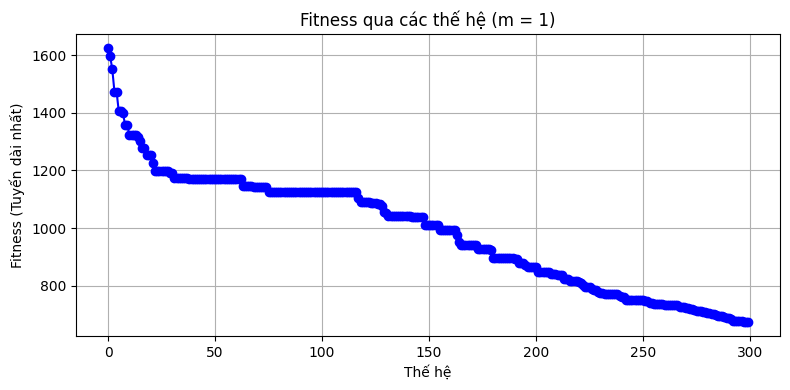


=== Số người (m) = 2 ===


Chạy GA (m = 2):   0%|                          | 1/300 [00:00<00:34,  8.62it/s]

[Gen   0] Best fitness: 869.32


Chạy GA (m = 2):   7%|█▊                       | 21/300 [00:03<00:42,  6.53it/s]

[Gen  20] Best fitness: 741.87


Chạy GA (m = 2):  14%|███▌                     | 42/300 [00:05<00:28,  9.18it/s]

[Gen  40] Best fitness: 703.38


Chạy GA (m = 2):  21%|█████▏                   | 62/300 [00:09<00:34,  6.81it/s]

[Gen  60] Best fitness: 647.03


Chạy GA (m = 2):  27%|██████▊                  | 82/300 [00:11<00:23,  9.12it/s]

[Gen  80] Best fitness: 627.63


Chạy GA (m = 2):  34%|████████                | 101/300 [00:14<00:45,  4.36it/s]

[Gen 100] Best fitness: 621.50


Chạy GA (m = 2):  41%|█████████▊              | 122/300 [00:17<00:24,  7.14it/s]

[Gen 120] Best fitness: 609.07


Chạy GA (m = 2):  47%|███████████▎            | 141/300 [00:20<00:19,  8.18it/s]

[Gen 140] Best fitness: 602.03


Chạy GA (m = 2):  54%|████████████▉           | 161/300 [00:23<00:26,  5.18it/s]

[Gen 160] Best fitness: 579.78


Chạy GA (m = 2):  60%|██████████████▍         | 181/300 [00:25<00:12,  9.52it/s]

[Gen 180] Best fitness: 559.59


Chạy GA (m = 2):  67%|████████████████        | 201/300 [00:28<00:16,  6.10it/s]

[Gen 200] Best fitness: 559.59


Chạy GA (m = 2):  74%|█████████████████▋      | 221/300 [00:32<00:17,  4.61it/s]

[Gen 220] Best fitness: 559.59


Chạy GA (m = 2):  80%|███████████████████▎    | 241/300 [00:35<00:06,  9.36it/s]

[Gen 240] Best fitness: 526.82


Chạy GA (m = 2):  87%|████████████████████▉   | 261/300 [00:37<00:03,  9.95it/s]

[Gen 260] Best fitness: 503.67


Chạy GA (m = 2):  94%|██████████████████████▍ | 281/300 [00:38<00:01, 10.82it/s]

[Gen 280] Best fitness: 503.67


Chạy GA (m = 2): 100%|████████████████████████| 300/300 [00:40<00:00,  7.38it/s]


[Gen 299] Best fitness: 503.67
Tổng quãng đường: 1006.83
Tuyến dài nhất (fitness): 503.67
Chênh lệch giữa các tuyến (Balance metric): 0.51
Thời gian thực thi: 40.9977 giây
Số vòng lặp để hội tụ: 23
Tốc độ hội tụ: 15.8978 đơn vị/gen
 - Tuyến 1 (503.67): [0, 95, 124, 126, 40, 115, 114, 94, 97, 87, 65, 33, 100, 67, 116, 122, 103, 88, 13, 50, 107, 106, 28, 36, 51, 55, 21, 59, 12, 112, 27, 111, 113, 93, 90, 24, 29, 31, 70, 91, 81, 101, 76, 71, 92, 86, 23, 6, 7, 20, 30, 22, 18, 89, 75, 61, 66, 32, 25, 45, 117, 109, 72, 9, 0]
 - Tuyến 2 (503.16): [0, 52, 10, 79, 17, 78, 14, 48, 44, 35, 96, 108, 77, 15, 80, 47, 16, 34, 39, 125, 98, 8, 5, 57, 46, 43, 54, 63, 68, 99, 26, 118, 110, 41, 11, 42, 53, 1, 74, 85, 83, 84, 82, 104, 56, 58, 60, 2, 3, 49, 4, 69, 64, 102, 62, 120, 73, 19, 105, 123, 121, 37, 119, 38, 0]


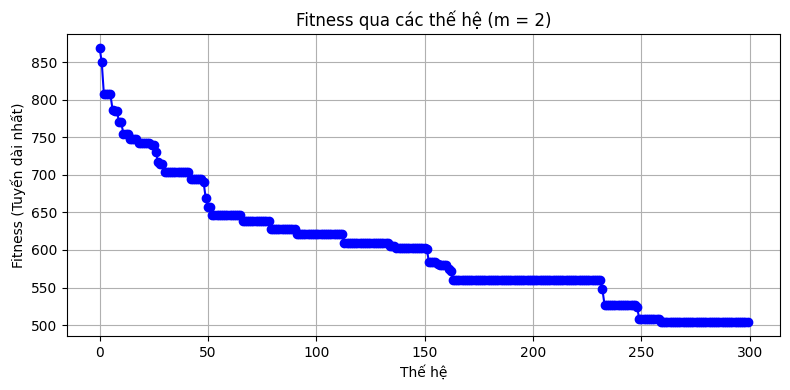


=== Số người (m) = 3 ===


Chạy GA (m = 3):   0%|                          | 1/300 [00:00<00:36,  8.23it/s]

[Gen   0] Best fitness: 601.52


Chạy GA (m = 3):   7%|█▊                       | 21/300 [00:02<00:26, 10.57it/s]

[Gen  20] Best fitness: 497.52


Chạy GA (m = 3):  14%|███▌                     | 42/300 [00:04<00:30,  8.41it/s]

[Gen  40] Best fitness: 487.83


Chạy GA (m = 3):  15%|███▋                     | 44/300 [00:04<00:27,  9.32it/s]


KeyboardInterrupt: 

In [4]:

for m in range(1, 4):
    print(f"\n=== Số người (m) = {m} ===")
    
    start_time = time.time()
    total_distance, routes, fitness, fitness_per_generation = solve(distance_matrix, m)
    end_time = time.time()

    exec_time = end_time - start_time

    # Tính độ dài từng tuyến để đánh giá
    route_distances = [
        sum(distance_matrix[r[i]][r[i+1]] for i in range(len(r)-1))
        for r in routes
    ]
    max_len = max(route_distances)
    min_len = min(route_distances)
    balance_metric = max_len - min_len

    # Phân tích hội tụ
    converged_gen = detect_convergence(fitness_per_generation)
    convergence_speed = (fitness_per_generation[0] - fitness_per_generation[-1]) / converged_gen if converged_gen else 0

    # In kết quả
    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Tuyến dài nhất (fitness): {fitness:.2f}")
    print(f"Chênh lệch giữa các tuyến (Balance metric): {balance_metric:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp để hội tụ: {converged_gen}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")

    for i, r in enumerate(routes):
        print(f" - Tuyến {i+1} ({route_distances[i]:.2f}): {r}")

    # Vẽ biểu đồ fitness
    plt.figure(figsize=(8, 4))
    plt.plot(fitness_per_generation, marker='o', linestyle='-', color='blue')
    plt.title(f"Fitness qua các thế hệ (m = {m})")
    plt.xlabel("Thế hệ")
    plt.ylabel("Fitness (Tuyến dài nhất)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# GASA


# RLGA

# NSGA II